# Modeling the dynamics of acute and chronic hepatits B with optimal control

Tahir Khan, Fathalla A. Rihan, & Hijaz Ahmed  
Scientific Reports  
(2023) 13:14980  
doi: 10.1038/s41598-023-39582

## System of deterministic ODEs

$$
\Large
\left\{
\begin{equation*}
\begin{aligned}
\frac{dS}{dt} &= \{1 - \eta B(t)\}\Lambda - \{\nu + \mu_0\}S(t) - \{A(t) + \gamma B(t)\}\alpha S(t), \\
\frac{dA}{dt} &= \alpha S(t)A(t) + \gamma\alpha S(t)B(t) - \{\gamma_1 + \beta + \mu_0\}A(t), \\
\frac{dB}{dt} &= \beta A(t) - \{\mu_1 + \gamma_2 + \mu_0\}B(t) + \eta\Lambda B(t), \\
\frac{dR}{dt} &= \gamma_2 B(t) - \mu_0 R(t) + \gamma_1 A(t) + \nu S(t). 
\end{aligned}
\end{equation*}
\right.
$$



$\large\Lambda\colon\text{The rate of newborns,}$  
$\large\nu\colon\text{The vaccination parameter,}$  
$\large\eta\colon\text{The maternally infected,}$  
$\large\gamma\colon\text{The reduced transmission rate,}$  
$\large\mu_0\colon\text{The proportion of natural death,}$  
$\large\mu_1\colon\text{The portion of death due to the disease,}$  
$\large\alpha\colon\text{The contact parameter,}$  
$\large\gamma_1\colon\text{The recovery rate from acute class,}$  
$\large\gamma_2\colon\text{The recovery rate from chronic class,}$  
$\large\beta\colon\text{The proportion who move from acute class to chronic.}$  

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### System Parameters

In [22]:
# parameters
Lambda = 0.0121
eta = 0.5
mu_0 = 0.01693
nu = 0.02
alpha = 0.95
gamma = 0.16
gamma_1 = 0.05
beta = 0.23
gamma_2 = 0.002
mu_1 = 0.8

w1, w2, w3, w4 = 0.10, 0.6, 0.001, 0.9

# initial conditions
S0, A0, B0, R0 = 80, 10, 5, 5

### System of ODEs

In [23]:
def deterministic_model(t, Y):
    S, A, B, R = Y 
    scale = 100
    
    dS = (1 - eta * B / scale) * Lambda - (nu + mu_0) * S - (A + gamma * B) * alpha * S / scale
    dA = alpha * S * A / scale + gamma * alpha * S * B / scale - (gamma_1 + beta + mu_0) * A
    dB = beta * A - ( mu_1 + gamma_2 + mu_0) * B + eta * Lambda * B / scale
    dR = gamma_2 * B - mu_0 * R + gamma_1 * A + nu * S
    
    return np.array([dS, dA, dB, dR])


### System solution

In [24]:
def rk4(f, t, Y0, dt):
    k1 = dt * f(t, Y0)
    k2 = dt * f(t + dt/2, Y0 + k1/2)
    k3 = dt * f(t + dt/2, Y0 + k2/2)
    k4 = dt * f(t + dt, Y0 + k3)
    
    return Y0 + (k1 + 2*k2 + 2*k3 + k4) / 6

def solve(S0, A0, B0, R0, t0=0, tf=20, dt=0.05):
    ts = np.arange(t0, tf + dt, dt)
    Y0 = np.array([S0, A0, B0, R0])
    
    S, A, B, R = list(), list(), list(), list()
    
    for t in ts:
        S.append(Y0[0])
        A.append(Y0[1])
        B.append(Y0[2])
        R.append(Y0[3])
        Y0 = rk4(deterministic_model, t, Y0, dt)
    
    return ts, np.array(S), np.array(A), np.array(B), np.array(R)


### Solution Plot

In [25]:
S_vals = range(95, 69, -5)
A_vals = range(90, 64, -5)
B_vals = range(85, 59, -5)
R_vals = range(80, 54, -5)

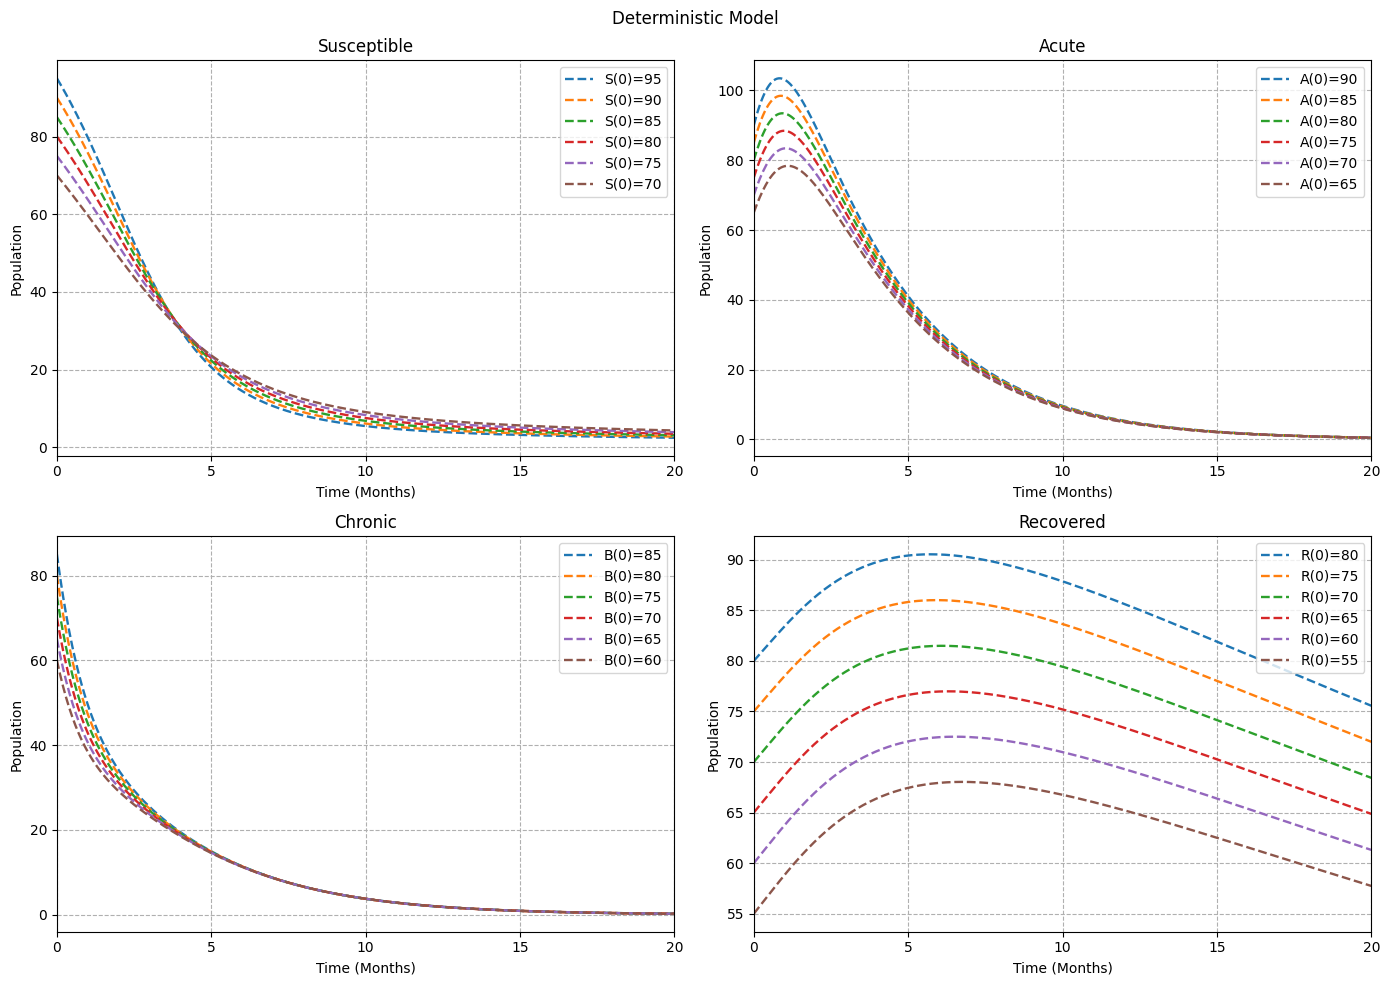

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs = axs.flatten()

for S0 in S_vals:
    axs[0].plot(*solve(S0, A0, B0, R0)[:2], ls="--", lw=1.7, label=f"S(0)={S0}")
    
axs[0].set_title("Susceptible")
# axs[0].set_ylim(0, 100)
# axs[0].set_yticks(range(0, 101, 10))

for A0 in A_vals:
    axs[1].plot(*solve(S0, A0, B0, R0)[:3:2], ls="--", lw=1.7, label=f"A(0)={A0}")
    
axs[1].set_title("Acute")
# axs[1].set_ylim(0, 120)
# axs[1].set_yticks(range(0, 121, 20))

for B0 in B_vals:
    axs[2].plot(*solve(S0, A0, B0, R0)[:4:3], ls="--", lw=1.7, label=f"B(0)={B0}")
    
axs[2].set_title("Chronic")
# axs[2].set_ylim(0, 90)
# axs[2].set_yticks(range(0, 91, 10))

for R0 in R_vals:
    axs[3].plot(*solve(S0, A0, B0, R0)[::4], ls="--", lw=1.7, label=f"R(0)={R0}")
    
axs[3].set_title("Recovered")
# axs[3].set_ylim(0, 90)
# axs[3].set_yticks(range(0, 91, 10))

for ax in axs:
    ax.set_xlabel("Time (Months)")
    ax.set_ylabel("Population")
    ax.set_xlim(0, 20)
    ax.set_xticks(range(0, 21, 5))
    ax.grid(True, ls="--")
    ax.legend()

fig.suptitle("Deterministic Model")

plt.tight_layout()
plt.show()


## Controlled model


$$
\Large
\left\{
\begin{equation*}
\begin{aligned}
\frac{dS}{dt} &= (1 - \eta B)\Lambda - (\mu_0 + u_1)S - \alpha S (A + \gamma B), \\
\frac{dA}{dt} &= \alpha S (A + \gamma B) - (u_2 + \mu_0 + \gamma_1 + \beta)A, \\
\frac{dB}{dt} &= \beta A - (\mu_1 + \gamma_2 + \mu_0 + \eta\Lambda + u_2) B, \\
\frac{dR}{dt} &= \gamma_2 B - \mu_0 R + \gamma_1 A + u_1 S + (B + A)u_2. 
\end{aligned}
\end{equation*}
\right.
$$

$\bold{u_1(t)}$: Vaccination effort  
$\bold{u_2(t)}$: Treatment effort  

$$
\large
0 \le u_1(t), u_2(t) \le 1
$$


### Objective functional

$$
\Large
J(u_1, u_2) = \int_0^T \Big(w_1A+w_2B+\frac{1}{2}(w_3u_1^2+w_4u_2^2)\Big)dt
$$

### Hamiltonian

$$
\Large
\mathcal{H} = -L + \lambda\cdot g \\
\therefore \mathcal{H} = w_1A + w_2B + \frac{1}{2}(w_3u_1^2 + w_4u_2^2) + \lambda_1\dot{S} + \lambda_2\dot{A} + \lambda_3\dot{B} + \lambda_4\dot{R}
$$

$\large g = (g_1, g_2, g_3, g_4)$  
$\large \lambda = (\lambda_1, \lambda_2, \lambda_3, \lambda_4)$  
$\large L = w_1A+w_2B+\frac{1}{2}(w_3u_1^2+w_4u_2^2)$

### Adjoint system

$$
\Large
\left\{
\begin{equation*}
\begin{aligned}
\lambda_1' &= (\alpha A + \gamma\alpha B)(\lambda_1 - \lambda_2) + \lambda_1(\mu_9 + u_1) - \lambda_4 u_1, \\
\lambda_2' &= \alpha S (\lambda_1 - \lambda_2) + (\mu_0 + \gamma_1 + \beta + u2)\lambda_2 - \beta\lambda_3- (\gamma_1 + u_2)\lambda_4, \\
\lambda_3' &= w_2 - (\lambda_2 - \lambda_1)\gamma\alpha S + \lambda_3(\mu_0 + \mu_1 - \Lambda\eta + u_2 + \gamma_2) - \lambda_4(\gamma_2 + u_2), \\
\lambda_4' &= \mu_0\lambda_4. 
\end{aligned}
\end{equation*}
\right.
$$

In [27]:
def adjoint_system(Y, L, u1, u2):
    S, A, B, _ = Y
    l1, l2, l3, l4 = L
    scale = 100
    
    dl1 = (mu_0 + u1)*l1 + alpha*(A + gamma*B)/scale*(l1 - l2) - l4*u1
    dl2 = w1 + alpha*S/scale*(l1 - l2) + (mu_0 + gamma_1 + beta + u2) * l2 - beta * l3 - (gamma_1 + u2)*l4
    dl3 = w2 - gamma*alpha*S/scale*(l1 - l2) + (mu_0 + mu_1- eta*Lambda + gamma_2 + u2)*l3 - (gamma_2 + u2)*l4
    dl4 = mu_0*l4
    
    return np.array([dl1, dl2, dl3, dl4])

$$
\Large
u_1^* = \max\Bigg(\min\bigg(\frac{1}{w_3}S^*(\lambda_4 - \lambda_1), 1\bigg), 0\Bigg), \\
u_2^* = \max\Bigg(\min\bigg(\frac{1}{w_4}(\lambda_4 - \lambda_3)B^* - (\lambda_2 - \lambda_4)A^*, 1\bigg), 0\Bigg).
$$

In [28]:
def optimal_controls(Y, L):
    S, A, B, _ = Y
    l1, l2, l3, l4 = L
    
    u1 = np.max([0, np.min([1, (S * (l4 - l1)) / w3])])
    u2 = np.max([0, np.min([1, ((l4 - l3)*B/w4 - (l2 - l4)*A)])])
    
    return u1, u2

In [29]:
def controlled_model(Y, u1, u2):
    S, A, B, R = Y
    scale = 100
    
    dS = (1 - eta * B / scale) * Lambda - alpha * S * A / scale - gamma * alpha * S * B / scale - (mu_0 + u1) * S
    dA = alpha * S * A / scale + gamma * alpha * S * B / scale - (mu_0 + gamma_1 + beta + u2) * A
    dB = beta * A - (mu_0 - Lambda * eta + gamma_2 + mu_1 + u2) * B
    dR = gamma_1 * A + gamma_2 * B + u1 * S + (A + B) * u2 - mu_0 * R
    
    return np.array([dS, dA, dB, dR])


In [30]:
def solve_optimal_control(Y0, tf=20, dt=0.05, iter=40):
    t = np.arange(0, tf+dt, dt)
    n = len(t)
    
    u1 = np.zeros(n)
    u2 = np.zeros(n)
    
    for _ in range(iter):
        Y = np.zeros((n, 4))
        Y[0] = Y0
        for i in range(n - 1):
            Y[i+1] = rk4(lambda _, y: controlled_model(y, u1[i], u2[i]), t[i], Y[i], dt)
        
        L = np.zeros((n, 4))
        for i in reversed(range(n - 1)):
            L[i] = rk4(lambda _, y: adjoint_system(y, L[i+1], u1[i], u2[i]), t[i], Y[i], dt)
        
        for i in range(n):
            u1[i], u2[i] = optimal_controls(Y[i], L[i])
        
    return t, Y, u1, u2



### Solution plot

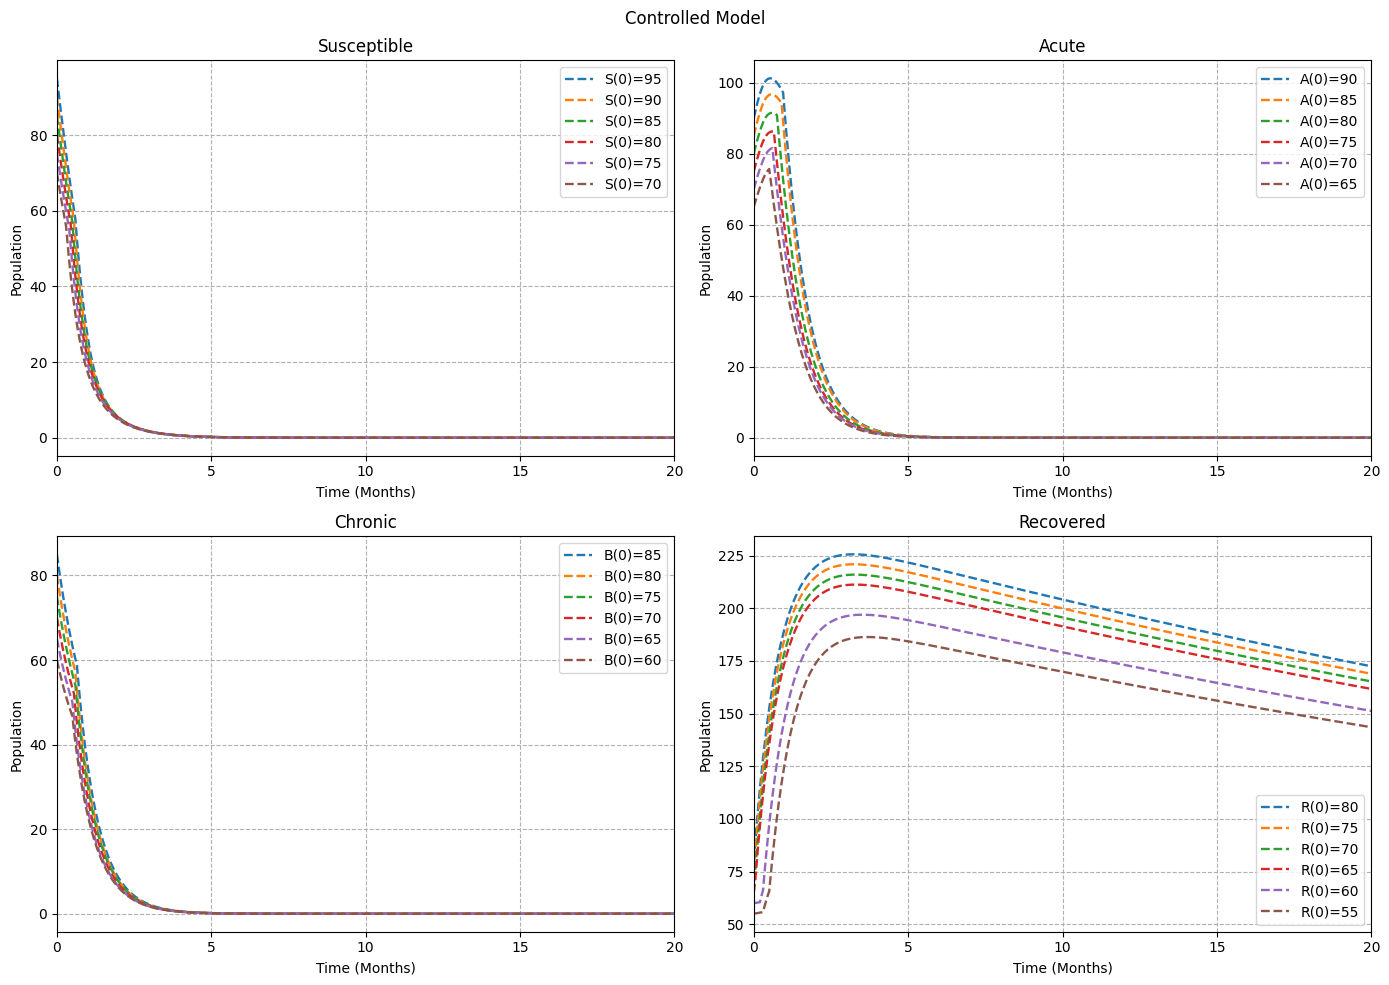

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs = axs.flatten()

for S0 in S_vals:
    t, Y, u1, u2 = solve_optimal_control([S0, A0, B0, R0])
    axs[0].plot(t, Y[:,0], ls="--", lw=1.7, label=f"S(0)={S0}")
    
axs[0].set_title("Susceptible")
# axs[0].set_ylim(0, 100)
# axs[0].set_yticks(range(0, 101, 10))

for A0 in A_vals:
    t, Y, u1, u2,= solve_optimal_control([S0, A0, B0, R0])
    axs[1].plot(t, Y[:,1], ls="--", lw=1.7, label=f"A(0)={A0}")
    
axs[1].set_title("Acute")
# axs[1].set_ylim(0, 100)
# axs[1].set_yticks(range(0, 111, 20))

for B0 in B_vals:
    t, Y, u1, u2 = solve_optimal_control([S0, A0, B0, R0])
    axs[2].plot(t, Y[:,2], ls="--", lw=1.7, label=f"B(0)={B0}")
    
axs[2].set_title("Chronic")
# axs[2].set_ylim(0, 90)
# axs[2].set_yticks(range(0, 91, 10))

for R0 in R_vals:
    t, Y, u1, u2 = solve_optimal_control([S0, A0, B0, R0])
    axs[3].plot(t, Y[:,3], ls="--", lw=1.7, label=f"R(0)={R0}")
    
axs[3].set_title("Recovered")
# axs[3].set_ylim(0, 140)
# axs[3].set_yticks(range(0, 141, 10))

for ax in axs:
    ax.set_xlabel("Time (Months)")
    ax.set_ylabel("Population")
    ax.set_xlim(0, 20)
    ax.set_xticks(range(0, 21, 5))
    ax.grid(True, ls="--")
    ax.legend()

fig.suptitle("Controlled Model")

plt.tight_layout()
plt.show()


## Controled vs Uncontrolled

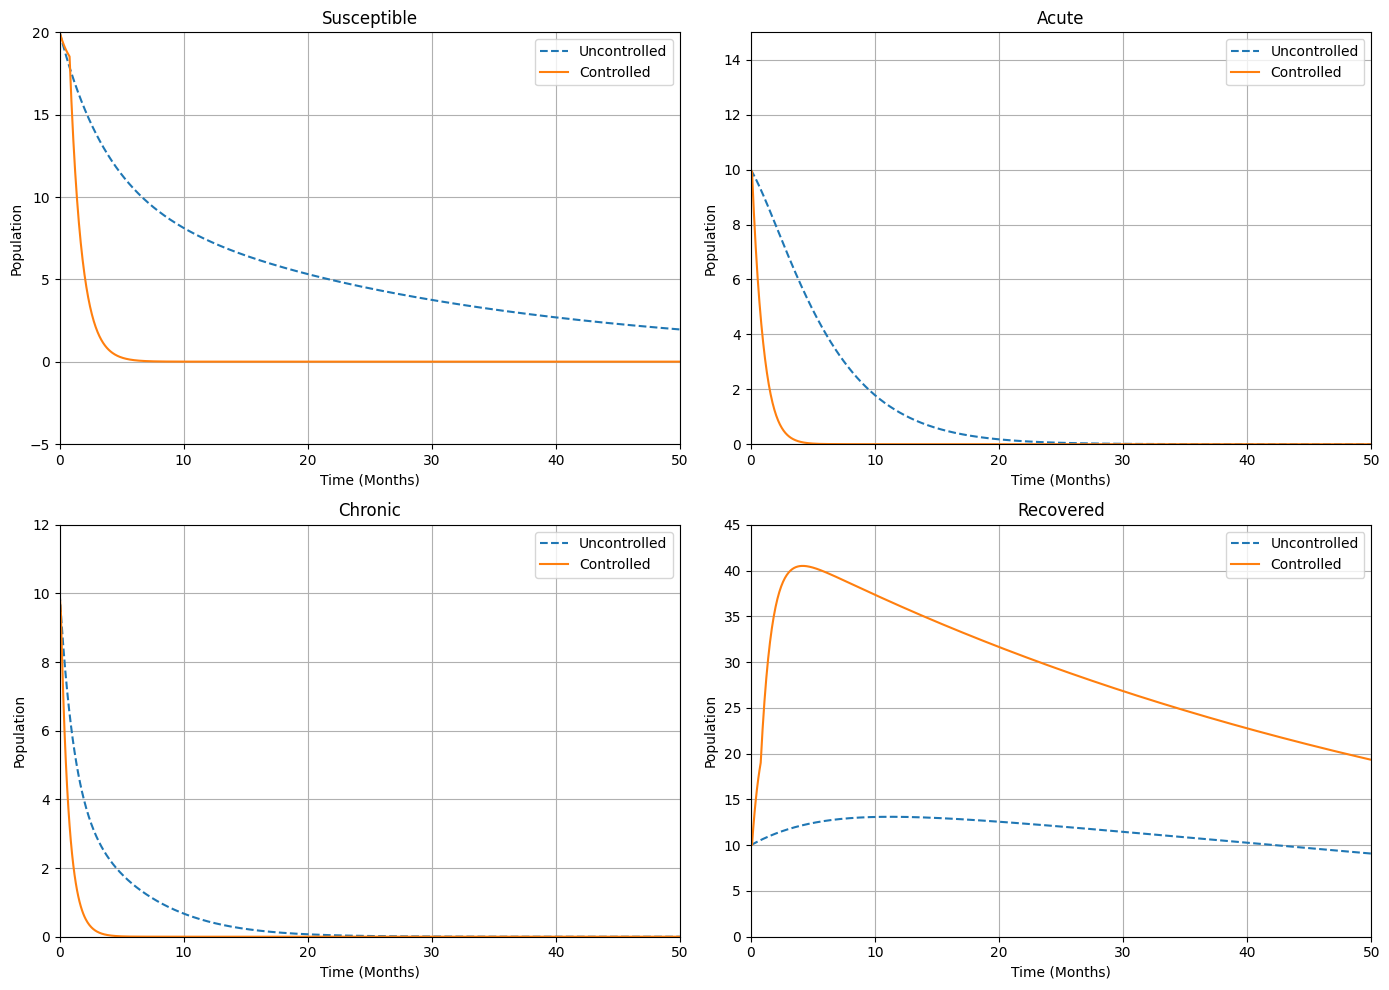

In [32]:
t_u, S_u, A_u, B_u, R_u = solve(20, 10, 10, 10, tf=50)
t_c, Y_c, u1, u2 = solve_optimal_control([20, 10, 10, 10], tf=50)

S_c, A_c, B_c, R_c = Y_c[:,0], Y_c[:,1], Y_c[:,2], Y_c[:,3]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

axs[0].plot(t_u, S_u, '--', label="Uncontrolled")
axs[0].plot(t_c, S_c, label="Controlled")
axs[0].set_title("Susceptible")

axs[1].plot(t_u, A_u, '--', label="Uncontrolled")
axs[1].plot(t_c, A_c, label="Controlled")
axs[1].set_title("Acute")

axs[2].plot(t_u, B_u, '--', label="Uncontrolled")
axs[2].plot(t_c, B_c, label="Controlled")
axs[2].set_title("Chronic")

axs[3].plot(t_u, R_u, '--', label="Uncontrolled")
axs[3].plot(t_c, R_c, label="Controlled")
axs[3].set_title("Recovered")

for ax in axs:
    ax.set_xlabel("Time (Months)")
    ax.set_ylabel("Population")
    ax.set_xlim(0, 50)
    ax.grid(True)
    ax.legend()

axs[0].set_ylim(-5, 20)
axs[1].set_ylim(0, 15)
axs[2].set_ylim(0, 12)
axs[3].set_ylim(0, 45)

plt.tight_layout()
plt.show()


## Control functions over time

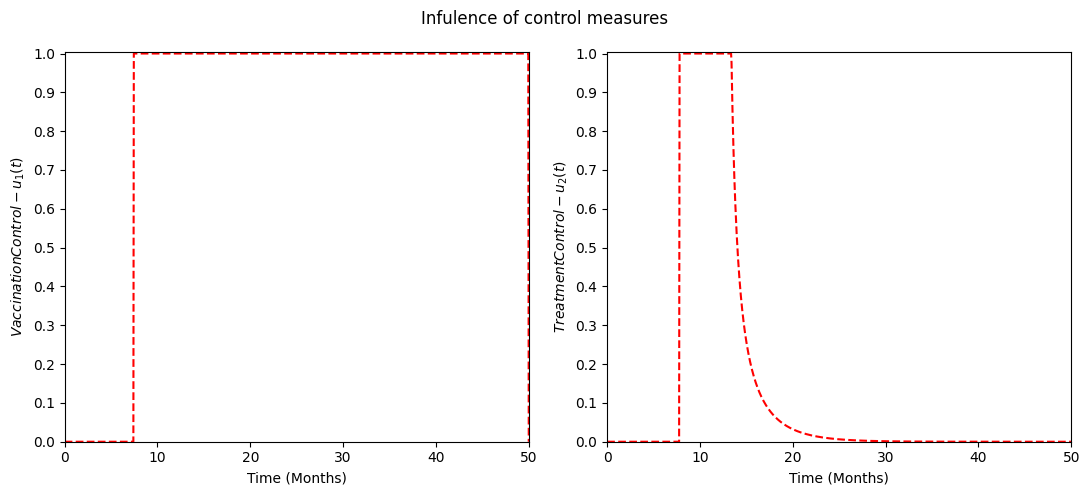

In [33]:
t, _, u1, u2 = solve_optimal_control([80, 10, 5, 5], tf=50, dt=0.05)

fig, axs = plt.subplots(1, 2, figsize=(11, 5))

fig.suptitle("Infulence of control measures")


axs[0].plot(t, u1, "r--")
axs[0].set_xlabel("Time (Months)")
axs[0].set_ylabel(r"$Vaccination Control - u_1(t)$")

axs[1].plot(t, u2, "r--")
axs[1].set_xlabel("Time (Months)")
axs[1].set_ylabel(r"$Treatment Control - u_2(t)$")

for ax in axs:
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 1.005)
    ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()

In [34]:
def R0_controlled(u1, u2):
    numerator = alpha * Lambda * (gamma * (mu_0 + gamma_1 + beta + u2) + beta)
    denominator = ((mu_0 + u1) * (mu_0 + gamma_1 + beta + u2) * (mu_0 + mu_1 + gamma_2 + u2 - eta * Lambda))
    return numerator / denominator

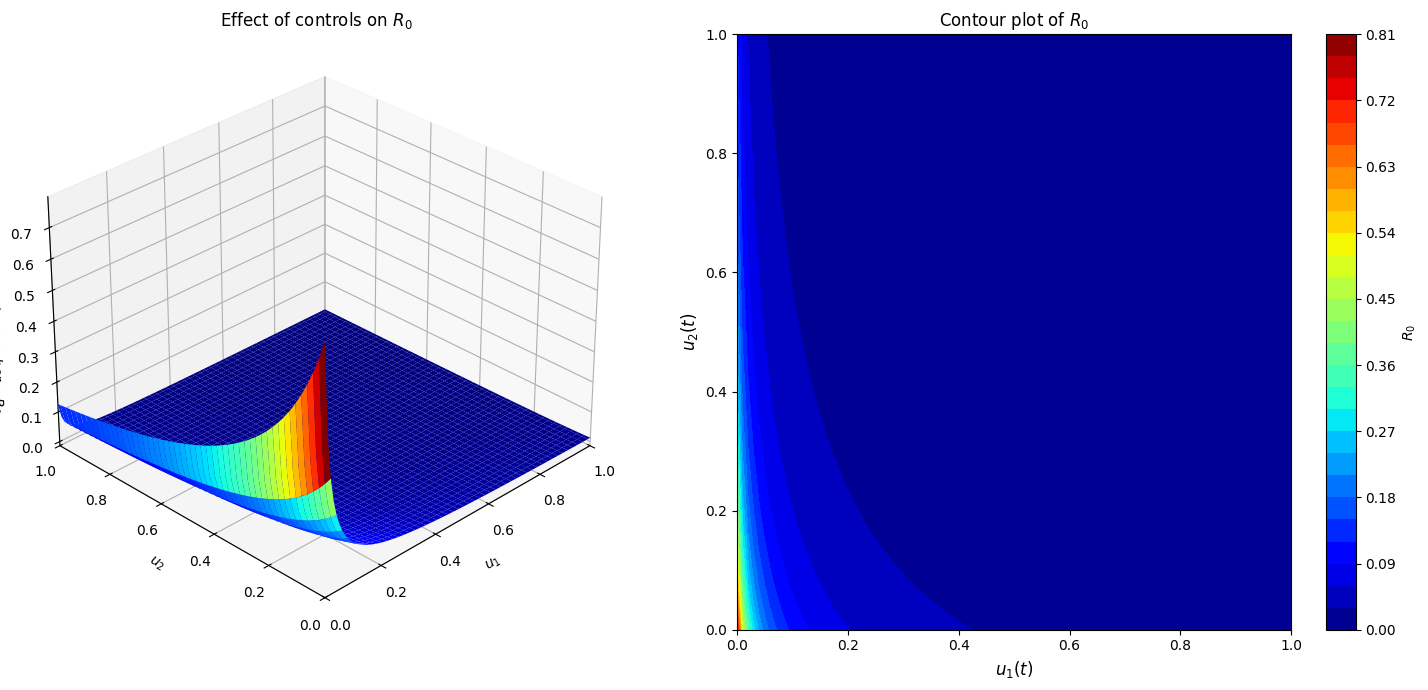

In [35]:
u1_vals = np.linspace(0, 1, 100)
u2_vals = np.linspace(0, 1, 100)

U2, U1 = np.meshgrid(u2_vals, u1_vals)

R0_vals = R0_controlled(U1, U2)

fig = plt.figure(figsize=(15, 7))


ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(U1, U2, R0_vals, cmap='jet', edgecolor='none')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_xticks(np.arange(0, 1.1, .2))
ax1.set_yticks(np.arange(0, 1.1, .2))
ax1.view_init(azim=225)
ax1.set_xlabel("$u_1$")
ax1.set_ylabel("$u_2$")
ax1.set_zlabel("$Reproductive number - R_0$")
ax1.set_title("Effect of controls on $R_0$")


ax2 = fig.add_subplot(122)
cont = ax2.contourf(U1, U2, R0_vals, levels=30, cmap='jet')

ax2.set_xlabel("$u_1(t)$", size=12)
ax2.set_ylabel("$u_2(t)$", size=12)
ax2.set_title("Contour plot of $R_0$")

fig.colorbar(cont, ax=ax2, label="$R_0$")

plt.tight_layout()
plt.show()
